# **Kurtosis**

## Definition

**Kurtosis** is a statistical measure used to determine whether the tails of a given distribution are heavier or lighter compared to those of a normal distribution.

## Description

A distribution is said to have a heavy tail if its tails are fatter than those of a normal distribution. This indicates a higher likelihood of extreme values occurring in the dataset.

Symmetric distributions are classified based on the shape of their tails. A normal distribution is termed **mesokurtic**. Distributions with fatter tails are known as **leptokurtic**, while those with lighter tails are called **platykurtic**.

The formula for kurtosis is :

$  \text{Kurtosis} = \sum_{i=1}^{n} \frac{(X_{i}-\bar{X})^{4}/N}{s^{4}}$

Thus, kurtosis is also called the fourth moment of a distribution.

In this context, a normal distribution exhibits a kurtosis value of $3$. Distributions with kurtosis greater than $3$ are considered to have fat tails, whereas those with kurtosis less than $3$ have thin tails

## Demonstration and Diagram

In [1]:
# Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# Download BTC-USD historical data
df = pd.DataFrame(yf.download("BTC-USD")["Adj Close"])
df.columns = ["BTC"]
df.head()

[*********************100%%**********************]  1 of 1 completed


,BTC
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


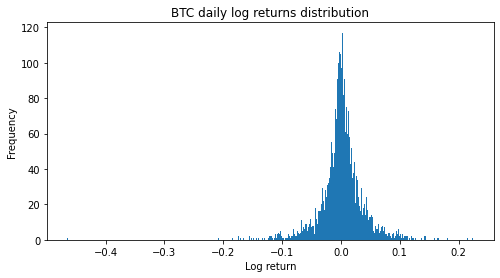

In [2]:
# Calculate log returns
df["log_r"] = np.log(df["BTC"] / df["BTC"].shift(1))

# Plot log returns as a histogram
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df["log_r"], bins=500);
ax.set(title="BTC daily log returns distribution", ylabel="Frequency", xlabel="Log return");

As can be seen visually, Bitcoin daily log returns show heavier tails compared to normal distribution and thus can be considered a **leptokurtic** distribution.

## Diagnosis

There are several ways for diagnosing kurtosis in a distribution:

* **Visual Inspection:** One of the simplest methods is to create a histogram or a density plot of the data. This visual representation can give an immediate sense of whether the distribution has fatter or thinner tails than a normal distribution.

* **Kurtosis Coefficient Calculation:** The kurtosis coefficient can be calculated using the fourth moment formula (described above): A kurtosis value of 3 indicates a normal distribution (mesokurtic). Values greater than 3 suggest heavy tails (leptokurtic), and values less than 3 indicate light tails (platykurtic).

* **Normality Tests:** While kurtosis is a measure of tail heaviness, it does not solely determine normality. Using normality tests like the Shapiro-Wilk test in conjunction with kurtosis analysis gives a more complete picture of the distribution's characteristics.

* **Q-Q Plot:** We can scatterplot our distribution against a normal distribution with same mean and variance, both ordered by quantiles, to check for normality and also whether kurtosis exists or not.

Let's use a Q-Q plot to diagnose kurtosis in BTC log returns in Python using statsmodels:

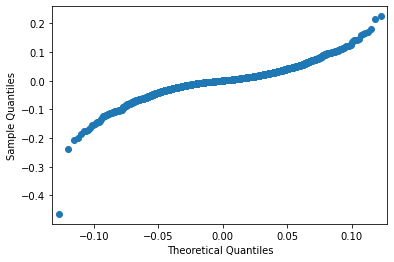

In [3]:
# Use the same mean and std as our distribution
mean = df["log_r"].mean()
std = df["log_r"].std()
sm.qqplot(df["log_r"], stats.distributions.norm(loc=mean, scale=std));

As we can see, our quantiles are not distributed linearly but instead curved on the edges. This means our distribution (BTC daily log returns) have heavy tails and has excess kurtosis.

## Damage

Kurtosis, particularly high kurtosis, can have significant implications in financial analysis and risk management:

* **Risk Management:** Standard risk management models often assume normal distributions. When the actual distribution of returns has high kurtosis, these models may not accurately capture the risk, leading to inadequate hedging strategies and potential unexpected losses.

* **Portfolio Optimization:** In portfolio optimization, the assumption of normality in return distributions can lead to misaligned risk-return trade-offs. High kurtosis might cause a portfolio to be more prone to extreme losses than anticipated, thereby affecting investment decisions.

* **Underestimation of Extreme Events:** High kurtosis, indicative of heavy tails, means that extreme values are more likely than what would be predicted by a normal distribution. In financial contexts, this can lead to the underestimation of the probability and potential impact of rare, extreme events, like market crashes or black swan events.

* **Stress Testing and Scenario Analysis:** Financial institutions use stress testing and scenario analyses to gauge potential losses under extreme conditions. If the actual distribution of returns has high kurtosis, these tests might not fully capture the extent of potential extreme outcomes.

## Directions

Addressing the problem of high kurtosis in financial data, especially when modeling financial returns or risks, requires the use of models other than normal distribution based models. These models can better accommodate the heavy tails often observed in financial data. Some of these include:

* **Student's t distribution:** Because it has heavier tails than the normal distribution (especially with lower degrees of freedom), Student's t distribution is useful to model usually heavy tailed financial data.

* **Copulas:** Useful in modeling the dependence structure between different financial instruments or markets, also allows for different marginal distributions, thus accommodating heavy tails.